(120, 120)
(120, 2)
In initialize_k  [[-0.31582928 -0.3770723 ]
 [-0.22434796 -0.63104746]
 [ 0.60306061 -0.19390091]]
30
Iteration:---------------------------------------------  0
c_initial  [[-0.31582928 -0.3770723 ]
 [-0.22434796 -0.63104746]
 [ 0.60306061 -0.19390091]]
In compute_cluster_dist  [[-0.31582928 -0.3770723 ]
 [-0.22434796 -0.63104746]
 [ 0.60306061 -0.19390091]]
[[0.83630066 0.89383652 0.20961497]
 [0.10873829 0.2747221  0.82823521]
 [0.50121027 0.77018801 1.08176186]
 [0.27181818 0.54084613 1.04186818]
 [0.79770257 0.96852115 0.61625354]
 [0.10208544 0.22251551 0.84937929]
 [0.60981725 0.87099507 1.0345931 ]
 [0.78640796 0.93514923 0.52535776]
 [0.6941662  0.95138406 1.0410724 ]
 [0.12354037 0.3869288  1.00640902]
 [0.83167037 1.00661276 0.64384241]
 [0.79380194 0.98159662 0.68864546]
 [0.96841471 1.11645507 0.57911709]
 [0.78640265 0.8591353  0.26831386]
 [0.15632604 0.20312949 0.81047951]
 [0.43954589 0.44482709 0.50574947]
 [0.589807   0.85674283 1.09131939]
 [0.231

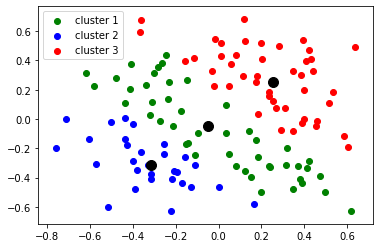

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 18 11:24:37 2020

@author: G.Varchaleswari
"""


import pandas as pd
from scipy.spatial import distance
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import numpy as np

from Bio import SeqIO

import numpy as np
# for record in SeqIO.parse("C:/Users/G.S Ramchandra/Downloads/HW2.fas", "fasta"):
#     print(record.sequence)
    

    
records = list(SeqIO.parse("C:/Users/G.S Ramchandra/Downloads/HW2.fas", "fasta"))
    # print(records[0].id)  # first record
    # print(records[-1].id)  # last record    


str_length = len(records[0].seq)

dist_matrix = np.zeros((120,120))

def compare(seq1, seq2):
            sum = 0
            i = 0;
            for i in range(str_length):
                     if(seq1[i] != seq2[i]):
                        sum += 1

            return sum   


for i in range(len(records)):
        for j in range(len(records)):
            dist_matrix[i][j] = compare(records[i].seq, records[j].seq)


print(dist_matrix.shape)
    # print(dist_matrix)
embedding = MDS(n_components=2, metric=False,  dissimilarity='precomputed')
dist_transformed = embedding.fit_transform(dist_matrix)

print(dist_transformed.shape)
    # print(dist_transformed)

#plt.scatter(dist_transformed[:, 0], dist_transformed[:, 1])

class k_means:
    def __init__(self, clusters, iterator):
        self.k = clusters
        self.iterator = iterator
    
    def initialize_k(self, data):
        centroids = data.copy()
        np.random.shuffle(centroids)
        centroids = centroids[:self.k]
        print("In initialize_k ", centroids)
#         print(centroids)   
#         # print(dist_transformed[:k])
#         plt.scatter(dist_transformed[:, 0], dist_transformed[:, 1], c='g')
#         plt.scatter(centroids[:,0],centroids[:,1], c='r')
#         plt.title("Initial clusters")
        return centroids
    
    
    def compute_cluster_dist(self, data, c):
        dist = np.zeros((data.shape[0], self.k))
        print("In compute_cluster_dist ", c)
        for i in range(self.k):
            dist[:,i] = np.sqrt(((data - c[i,:])**2.0).sum(axis = 1))
            
        return dist    

    def min_distance_cluster(self, c_dist):
#         print(np.argmin(c_dist, axis=1))
        return np.argmin(c_dist, axis=1)
    
    def cluster_analysis(self, min_dist, data):
        centroids = np.zeros((self.k,data.shape[1]))
        print("In cluster analysis ", centroids)
        for i in range(self.k):
            centroids[i,:] = np.mean(data[np.where(min_dist==i),:])
        print("In cluster analysis c value ", centroids)    
        return centroids
    
    def fit(self, data):
        self.centroids = self.initialize_k(data)
        print(self.iterator)
        for i in range(self.iterator):
            print("Iteration:--------------------------------------------- ", i)
            c_initial = self.centroids
            print("c_initial ",c_initial)
            dist = self.compute_cluster_dist(data, c_initial)
            print(dist)
            self.min_dist = self.min_distance_cluster(dist)
            print(self.min_dist)
            self.centroids = self.cluster_analysis(self.min_dist, data)
            print("self.c ",self.centroids)
            if np.all( c_initial == self.centroids):
                print("Iteration: ", i)
                break;
                
            
model = k_means(3, 30);
model.fit(dist_transformed)


# plt.scatter(dist_transformed[:, 0], dist_transformed[:, 1], c='g')
# plt.scatter(model.centroids[:,0],model.centroids[:,1], c='r')


plt.scatter(dist_transformed[np.where(model.min_dist==0),0], dist_transformed[np.where(model.min_dist==0), 1],
            c='green', label='cluster 1')
plt.scatter(model.centroids[0,0], model.centroids[0,1], c='black', marker='o', s=100)

plt.scatter(dist_transformed[np.where(model.min_dist==1), 0], dist_transformed[np.where(model.min_dist==1), 1],
            c='blue', label='cluster 2')
plt.scatter(model.centroids[1,0], model.centroids[1,1], c='black', marker='o', s=100)

plt.scatter(dist_transformed[np.where(model.min_dist==2), 0], dist_transformed[np.where(model.min_dist==2), 1],
            c="red", label='cluster 3')
plt.scatter(model.centroids[2,0], model.centroids[2,1], c='black', marker='o', s=100)

# plt.scatter(dist_transformed[np.where(model.min_dist==3), 0], dist_transformed[np.where(model.min_dist==3), 1],
#             c="yellow", label='cluster 4')
# plt.scatter(model.centroids[3,0], model.centroids[3,1], c='black', marker='o', s=100)
plt.legend()



In [113]:
class k_means:
    def __init__(self, clusters, iterator):
        self.k = clusters
        self.iterator = iterator
    
    def initialize_k(self, dist_transformed):
        centroids = dist_transformed.copy()
        np.random.shuffle(centroids)
        centroids = centroids[:self.k]
#         print(centroids)   
#         # print(dist_transformed[:k])
#         plt.scatter(dist_transformed[:, 0], dist_transformed[:, 1], c='g')
#         plt.scatter(centroids[:,0],centroids[:,1], c='r')
#         plt.title("Initial clusters")
        return centroids
    
    
    def compute_cluster_dist(self, data, c):
        dist = np.zeros((data.shape[0], self.k))
        for i in range(self.k):
            dist[:,i] = np.sqrt(((data - c[i,:])**2.0).sum(axis = 1))
            
        return dist    

    def min_distance_cluster(c_dist):
        print(np.argmin(c_dist, axis=1))
        return np.argmin(c_dist, axis=1)
    
    def cluster_analysis(self, min_dist, data):
        centroids = np.zeros((self.k,data.shape[1]))
        for i in range(self.k):
            centroids[i,:] = np.mean(data[np.where(min_dist==i),:])
        return centroids
    
    def fit(self, data):
        self.centroids = initialize_k(data)
        for i in range(iterator):
            c_initial = self.centroids
            dist = self.compute_cluster_dist(data, c_initial)
            min_dist = self.min_distance_cluster(dist)
            self.centroids = cluster_analysis(min_dist, data)
            if( c_initial == self.centroids ):
                break;
                
            








[1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 2 2 1 2 0 2 1 2 2 0 2 2 0 1 2 1 2 2 2 0
 2 2 1 1 0 0 1 0 2 1 1 2 0 0 1 0 1 2 0 2 2 0 1 1 0 2 0 1 0 0 2 2 1 2 2 0 1
 0 0 2 0 0 2 2 2 0 1 1 1 0 0 2 0 0 1 0 1 0 0 1 1 0 2 2 1 1 0 0 0 1 0 0 2 2
 2 1 1 2 2 2 0 2 0]
[[-0.29338905 -0.23763734]
 [-0.20476519  0.38786618]
 [ 0.4617423   0.10841519]]
[[-0.23388591 -0.23388591]
 [ 0.09343745  0.09343745]
 [ 0.19530221  0.19530221]]


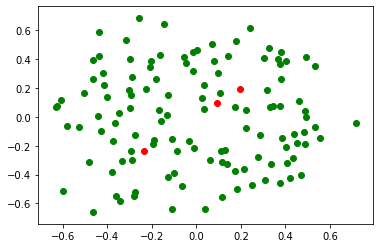

In [34]:
#%%

dist = np.zeros((dist_transformed.shape[0], k))

def compute_cluster(data, c):
    for i in range(k):
        dist[:,i] = np.sqrt(((data - c[i,:])**2.0).sum(axis = 1))
        

def min_distance_cluster(c_dist):
    return np.argmin(c_dist, axis=1)

compute_cluster(dist_transformed,centroids)

min_dist = min_distance_cluster(dist)
#print(dist)
print(min_dist)  
# print(np.mean(dist_transformed[np.where(min_dist==0),:]))

def cluster_analysis():
    centroids = np.zeros((k,dist_transformed.shape[1]))
    for i in range(k):
        centroids[i,:] = np.mean(dist_transformed[np.where(min_dist==i),:])
    return centroids

print(centroids)
cent = cluster_analysis()        
print(cent)

plt.scatter(dist_transformed[:, 0], dist_transformed[:, 1], c='g')
plt.scatter(cent[:,0],cent[:,1], c='r')




CACCTACAGCTGCCCTAGTGGTGTCGCAGTTACTCCGGATCCCACAAGTTGTCGTGGACATGGTAGCGGGGGCCCACTGGGGAGTCCTGGCGGGCCTTGCATACTATTCCATGGTGGGGAACTGGGCTAAGGTTTTGATTGTGATGCTGCTCTTTGCCGGCGTCGACGGGGAGACCCACACGACGGGGGGGTCGGCGGCCAAGAGTACTTTCAGGCTTACGAACATCTTTTCGCTAGGGCCGGCTCAGAAAATCCAGCTTATAA
[[ 0.  1.  1. ... 76. 74. 79.]
 [ 1.  0.  2. ... 77. 75. 80.]
 [ 1.  2.  0. ... 77. 75. 80.]
 ...
 [76. 77. 77. ...  0.  4. 28.]
 [74. 75. 75. ...  4.  0. 28.]
 [79. 80. 80. ... 28. 28.  0.]]
[[-0.43647993 -0.14092669]
 [ 0.2677541  -0.3093491 ]
 [-0.26896722 -0.36001833]
 [ 0.22026086  0.16135886]
 [ 0.32151491  0.34189872]
 [ 0.12870399  0.33681336]
 [ 0.37263854 -0.32362995]
 [-0.4743677   0.16977361]
 [-0.32358803 -0.17878361]
 [ 0.37862857  0.28951947]
 [-0.29902239  0.37475202]
 [-0.40472661 -0.22907539]
 [ 0.48761751  0.089478  ]
 [-0.12945981 -0.28047828]
 [ 0.30125792  0.35196461]
 [ 0.20225571 -0.10291575]
 [ 0.11735238  0.36052544]
 [ 0.40056604 -0.11339498]
 [ 0.46551743 -0.21955392]
 [ 0.48358447 -0.14762413]
 [-

[0 1 5 5 0 2 3 0 4 3 2 5 3 5 3 4 4 4 5 4 4 3 3 2 4 3 1 3 3 1 1 4 3 2 5 2 4
 3 0 3 3 3 4 0 3 0 4 5 4 0 2 1 4 3 4 2 0 2 4 3 0 5 3 3 5 1 5 0 2 0 3 1 2 4
 1 2 3 1 4 2 0 4 0 4 1 3 4 1 2 5 3 3 5 4 4 0 0 5 2 2 3 0 0 2 2 5 4 3 2 0 0
 5 1 1 2 4 3 0 3 2]
[[0.01465149 0.01465149]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[0.01465149 0.01465149]
 [0.40192124 0.40192124]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[0.01465149 0.01465149]
 [0.40192124 0.40192124]
 [0.12047389 0.12047389]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
[[ 0.01465149  0.01465149]
 [ 0.40192124  0.40192124]
 [ 0.12047389  0.12047389]
 [-0.14371643 -0.14371643]
 [ 0.          0.        ]
 [ 0.          0.        ]]
[[ 0.01465149  0.01465149]
 [ 0.40192124  0.40192124]
 [ 0.12047389  0.12047389]
 [-0.14371643 -0.14371643]
 [-0.33294466 -0.33294466]
 [ 0

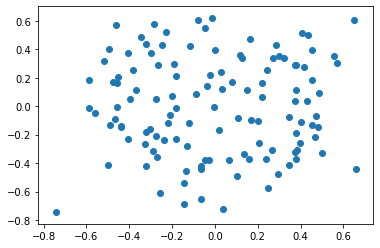

In [6]:
from Bio import SeqIO
import numpy as np
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import math

def hamming_count(A,B):
    count=0
    if(len(A)==len(B)):
        for i in range(0,len(A)):
            if(A[i]!=B[i]):
                count+=1
    return count


def med_init(X):
    return np.median(X,axis=0)


def distance(x1 , y1 , x2 , y2):  
    # Calculating distance
    math.sqrt(math.pow(x2 - x1, 2) + math.pow(y2 - y1, 2) * 1.0)

records = list(SeqIO.parse("C:/Users/G.S Ramchandra/Downloads/HW2.fas", "fasta"))
#print(records[0])
print(records[6].seq)


ham_dis=np.zeros([len(records),len(records)])
ham_dis.shape
#len(seq_strings)


for i in range(len(records)):
    for j in range(len(records)):
        ham_dis[i][j]=hamming_count(records[i].seq,records[j].seq)
       
print(ham_dis)

embedding=MDS(n_components=2,metric=False, dissimilarity='precomputed')


coord_matrix=embedding.fit_transform(ham_dis)


print(coord_matrix)
coord_matrix.shape


# visualize using scatter plot
plt.scatter(coord_matrix[:,0],coord_matrix[:,1])


distance_check=distance(0.02458264,-0.35718805,-0.27255186,-0.04540642)
print(distance_check)

#from random import sample
import numpy as np
#import math

class kmeans:
   
   
    def __init__(self,k,iter):
        self.k=k
        self.iter=iter
       
    def get_centroids(self,X):
        np.random.shuffle(X)
        return X[:self.k,:]
   
    #def distance(self, x1, y1, x2, y2):    
        #math.sqrt(math.pow(x2 - x1, 2) + math.pow(y2 - y1, 2) * 1.0)
   
    def eudistance(self,X,centroids):
        dist=np.zeros((len(X),self.k))
        # dist is a distance matrix of 120 *k dimension to hold distance of each coordinate from that cluster
        for k in range(self.k):
            dist[:,k]=np.sqrt(((X-centroids[k,:])**2).sum(axis=1))
        min_dist=np.argmin(dist, axis=1)
        print(min_dist)
        return dist,min_dist
   
    def update_centroids(self,X,min_dist):
        centroids=np.zeros((self.k,X.shape[1]))
        #print(centroids)
        for i in range(self.k):
            centroids[i,:]=np.mean(X[np.where(min_dist==i),:])
            print(centroids)
        return centroids
   
    def apply(self,X):
        centroids=self.get_centroids(X)
        for i in range(self.iter):
            o_centroids=centroids
            dmat, dmin=self.eudistance(X, centroids)
            centroids=self.update_centroids(X, dmin)
            if(np.all(o_centroids==centroids)):
                break



kmn=kmeans(6,100)
kmn.apply(coord_matrix)